<a href="https://colab.research.google.com/github/karyateguh/Prediction-of-price-rice-in-DKI-Jakarta/blob/master/Prediction_of_Price_Rice_in_DKI_Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Domain**

As basic needs, rice having significant increment in few months. Economics from University of Gajahmada (UGM) in [this article](https://feb.ugm.ac.id/en/news/4510-rice-prices-exceed-het-highest-record-in-rice-history-in-indonesia), said, the price rice reached IDR 18.000 per kg in February 2024. And it becomes the country highest record in the history.

Those who will get the benefit from this work are:

1. The Government : This is serious economics problem. The goverment should take action regarding this phenomenon.
2. Rice supplier : To make a strategy whether add more stock or not.
3. The public : To set financial strategy.
4. Other business selling secondary needs : To help to adjust what they sell. Since people tend to spend their money on basic ones first.

To solve this problem, we will use time series. By its fuction to predict the future rice price, everything will be handled better.

# **Business Understanding**

Problem Statements:


1. Which models can predict the best
2. How is the price rice in the future



Goals



1. To find out which model can predict the best
2. To find out the price rice in the future


Solutions

1. Using Deep Learning algorithm
2. Using Statistical algorithm


# **Data Understanding**

The data belong to Badan Pangan Nasional (www.bpn.go.id). The price is based on DKI Jakarta region. And it is taken from traditional market.



## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Loading

In [2]:
# Load dataset
url = 'https://github.com/karyateguh/Prediction-of-price-rice-in-DKI-Jakarta/raw/master/harga_eceran.csv'
df = pd.read_csv(url, dtype=str)
df.to_csv('harga_eceran.csv', index=False)

In [3]:
df

,Komoditas (Rp),01/01/2022,02/01/2022,03/01/2022,04/01/2022,05/01/2022,06/01/2022,07/01/2022,08/01/2022,09/01/2022,...,15/10/2024,16/10/2024,17/10/2024,18/10/2024,19/10/2024,20/10/2024,21/10/2024,22/10/2024,23/10/2024,24/10/2024
0,Beras Premium,12.660,12.660,12.390,12.390,12.390,12.390,12.470,12.390,12.390,...,15.560,15.460,15.330,15.330,15.180,15.330,15.180,15.030,15.110,14.910
1,Beras Medium,11.270,11.010,11.010,11.010,11.010,11.010,11.010,11.010,11.010,...,13.680,13.210,13.380,13.380,13.210,13.380,13.210,13.120,13.210,13.220
2,Kedelai Biji Kering (Impor),12.000,12.240,11.700,12.240,12.240,12.240,12.240,12.240,12.240,...,9.600,9.600,9.600,9.600,9.600,9.600,9.600,9.600,9.600,9.600
3,Bawang Merah,35.510,31.850,34.880,35.260,35.260,33.490,30.910,33.130,33.130,...,32.810,32.770,33.110,33.320,32.390,32.390,32.250,31.110,32.670,32.770
4,Bawang Putih Bonggol,32.770,29.490,32.180,32.180,32.180,32.180,30.100,32.180,32.180,...,40.600,41.830,41.300,41.300,41.300,41.300,41.300,39.120,40.520,41.830
5,Cabai Merah Keriting,51.800,44.860,44.780,44.780,43.910,42.940,36.920,42.000,40.030,...,30.530,28.930,31.130,30.160,31.830,32.670,32.670,32.510,33.390,36.300
6,Cabai Rawit Merah,98.730,98.730,97.420,95.730,88.960,80.320,73.340,76.210,76.210,...,47.870,49.300,48.100,48.830,49.500,50.180,50.800,51.260,50.120,50.080
7,Daging Sapi Murni,126.580,130.000,124.900,127.940,125.900,125.900,125.900,125.900,125.900,...,135.910,137.430,136.580,138.280,136.580,135.760,136.580,136.580,136.580,134.910
8,Daging Ayam Ras,35.990,36.480,37.160,36.180,36.370,36.180,35.200,35.200,35.200,...,35.920,36.110,36.330,36.780,36.800,37.090,37.090,36.810,38.120,36.730
9,Telur Ayam Ras,32.200,30.980,30.860,30.690,29.880,29.560,27.520,28.960,28.450,...,27.760,28.330,27.790,27.500,27.500,27.650,27.500,26.820,27.500,27.930


The data is not in a good condition. At first, we can transpose it. Also, we can transform the string into integer.

### Convert data to integer and transpose it

In [4]:
def convert_to_int(df):
    df = df.astype(str).apply(lambda x: pd.to_numeric(x.str.replace('.', '', regex=False), errors='coerce')).astype('Int64')
    return df

In [5]:
df_transposed = df.T
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:]
df_transposed = convert_to_int(df_transposed)

In [6]:
df_transposed.to_csv('data_clean.csv', index=False)

## What are the variables of the data?

In [7]:
df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 01/01/2022 to 24/10/2024
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Beras Premium                      991 non-null    Int64
 1   Beras Medium                       991 non-null    Int64
 2   Kedelai Biji Kering (Impor)        988 non-null    Int64
 3   Bawang Merah                       991 non-null    Int64
 4   Bawang Putih Bonggol               991 non-null    Int64
 5   Cabai Merah Keriting               991 non-null    Int64
 6   Cabai Rawit Merah                  991 non-null    Int64
 7   Daging Sapi Murni                  991 non-null    Int64
 8   Daging Ayam Ras                    991 non-null    Int64
 9   Telur Ayam Ras                     991 non-null    Int64
 10  Gula Konsumsi                      991 non-null    Int64
 11  Minyak Goreng Kemasan Sederhana    991 non-null    Int64
 12  Tepung Ter

Here are the variable the data have:

1. Beras Premium
2. Beras Medium
3. Kedelai Biji Kering (impor)
4. Bawang Merah
5. Bawang Putih Bonggol
6. Cabai Merah Keriting
7. Cabai Rawit Merah
8. Daging Sapi Murni
9. Daging Ayam Ras
10. Telur Ayam Ras
11. Gula Konsumsi
12. Minyak Goreng Kemasan Sederhana
13. Tepung Terigu (curah)
14. Minyak Goreng Kemasan Premium
15. Minyak Goreng Curah
16. Jagung TK Peternak
17. Ikan Kembung
18. Ikan Tongkol
19. Ikan Bandeng
20. Garam Halus Beryodium
21. Tepung Teriugu Kemasan (Non Curah)

**NOTE:** This is the univariate data. All of the variables have no correlation one and another. This work focuses on analysing the price rice. We can delete all of unwanted columns. And keep Beras Premium and Beras Medium for reason.

### Drop unwanted columns

In [8]:
# Drop unnecessary columns
columns_to_drop = [
    'Kedelai Biji Kering (Impor)', 'Bawang Merah', 'Bawang Putih Bonggol',
    'Cabai Merah Keriting', 'Cabai Rawit Merah', 'Daging Sapi Murni',
    'Daging Ayam Ras', 'Telur Ayam Ras', 'Gula Konsumsi',
    'Minyak Goreng Kemasan Sederhana', 'Tepung Terigu (Curah)',
    'Minyak Goreng Curah', 'Jagung Tk Peternak', 'Ikan Kembung',
    'Ikan Tongkol', 'Ikan Bandeng', 'Garam Halus Beryodium',
    'Tepung Terigu Kemasan (non-curah)', 'Minyak Goreng Kemasan Premium'
]
df_transposed.drop(columns=columns_to_drop, inplace=True)

### Finding the missing data

In [9]:
df_transposed.isnull().sum()

,0
Komoditas (Rp),
Beras Premium,37
Beras Medium,37


In [10]:
for col in df_transposed.columns:
    missing_rows = df_transposed[df_transposed[col].isnull()]
    if not missing_rows.empty:
        print(f"Column '{col}' has NaN value in these rows:")
        print(missing_rows.index.tolist())


Column 'Beras Premium' has NaN value in these rows:
['10/06/2022', '11/06/2022', '12/06/2022', '13/06/2022', '14/06/2022', '15/06/2022', '16/06/2022', '17/06/2022', '18/06/2022', '19/06/2022', '20/06/2022', '21/06/2022', '22/06/2022', '23/06/2022', '24/06/2022', '25/06/2022', '26/06/2022', '27/06/2022', '28/06/2022', '29/06/2022', '30/06/2022', '01/07/2022', '02/07/2022', '03/07/2022', '04/07/2022', '05/07/2022', '06/07/2022', '07/07/2022', '08/07/2022', '09/07/2022', '10/07/2022', '11/07/2022', '12/07/2022', '13/07/2022', '09/01/2023', '10/04/2024', '11/04/2024']
Column 'Beras Medium' has NaN value in these rows:
['10/06/2022', '11/06/2022', '12/06/2022', '13/06/2022', '14/06/2022', '15/06/2022', '16/06/2022', '17/06/2022', '18/06/2022', '19/06/2022', '20/06/2022', '21/06/2022', '22/06/2022', '23/06/2022', '24/06/2022', '25/06/2022', '26/06/2022', '27/06/2022', '28/06/2022', '29/06/2022', '30/06/2022', '01/07/2022', '02/07/2022', '03/07/2022', '04/07/2022', '05/07/2022', '06/07/2022',

### Interpolate the missing data

In [11]:
df_transposed = df_transposed.interpolate(method='linear')

Using linear interpolation for time series data can be a smart choice, especially if simplicity and speed are priorities. Here’s a quick breakdown of why linear interpolation might work well and what to keep in mind:

Linear Interpolation Basics
Linear interpolation connects two data points with a straight line.

Pros: It’s fast and straightforward, making it especially useful if the data isn’t highly variable or if we only need a basic approximation between points.

Cons: Linear interpolation doesn't account for more complex trends between data points. In cases where data fluctuates or follows a non-linear trend, this method can result in sudden changes or less smooth transitions.

Why Linear?
Linear interpolation can work well for data that doesn’t show a lot of variation between points. Since it doesn’t need as much computation as spline interpolation, it’s a good fit if you need quick results and a simple approach. While it might not fully capture all the nuances in time series data, linear interpolation provides a clean, direct estimate between points and is often enough to keep things on track without overcomplicating the process.

In [12]:
df_transposed.isnull().sum()
df_transposed

Komoditas (Rp),Beras Premium,Beras Medium
01/01/2022,12660.0,11270.0
02/01/2022,12660.0,11010.0
03/01/2022,12390.0,11010.0
04/01/2022,12390.0,11010.0
05/01/2022,12390.0,11010.0
...,...,...
20/10/2024,15330.0,13380.0
21/10/2024,15180.0,13210.0
22/10/2024,15030.0,13120.0
23/10/2024,15110.0,13210.0


### Rename column and adjust date

In [13]:
df_final = df_transposed.reset_index().rename(columns={'index': 'date', 'Beras Premium': 'beras_premium', 'Beras Medium': 'beras_medium'})
df_final['date'] = pd.to_datetime(df_final['date'], format='%d/%m/%Y')


# Save final file
df_final.to_csv('data_final.csv', index=False)

## The Diagram Price Rice from 2022 to 2024

In [14]:
# Plotting
dates = df_final['date'].values
premium = df_final['beras_premium'].values
medium = df_final['beras_medium'].values

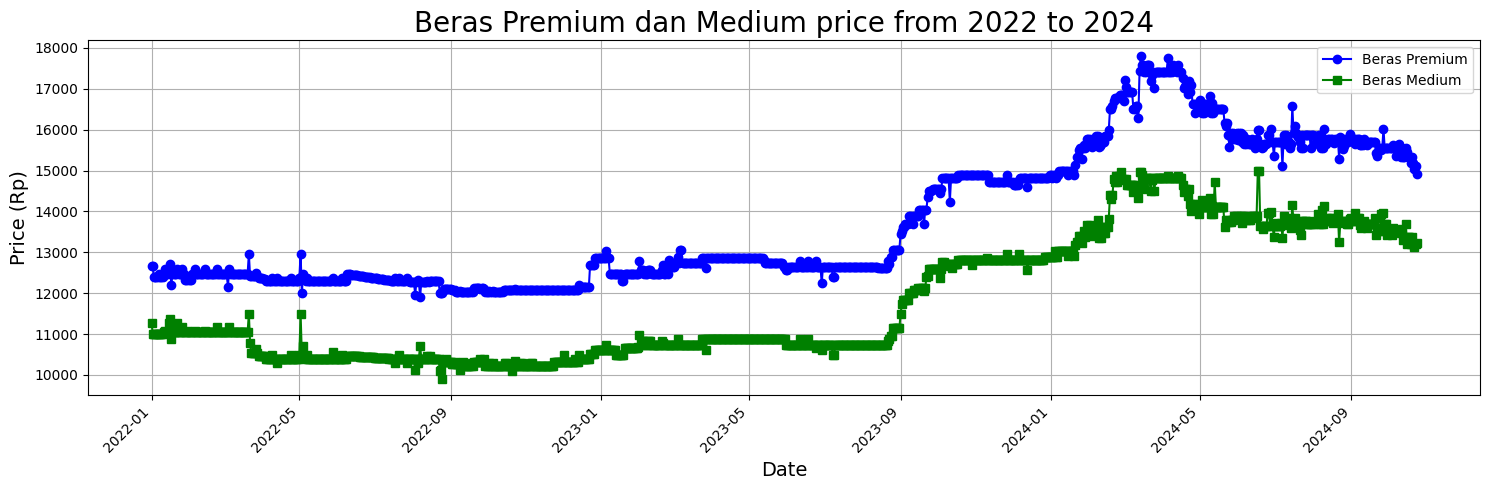

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(dates, premium, color='b', label='Beras Premium', marker='o')
plt.plot(dates, medium, color='g', label='Beras Medium', marker='s')
plt.title('Beras Premium dan Medium price from 2022 to 2024', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (Rp)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

beras_premium and beras_medium have simillar plot. From now on, we only use beras_premium as a variable to train.

# **Data Preparation**

## Normalization

Imagine you have a set of scores from a game, ranging from 0 to 100. Normalization changes these scores to fit within a range, usually 0 to 1. So if you have a score of 50, it might become 0.5 after normalization.
This is done by taking each score, subtracting the lowest score, and then dividing by the difference between the highest and lowest scores.


Why Use Normalization?

It helps when the data has different scales. For example, if you have one score that goes from 0 to 100 and another that goes from 0 to 1000, normalization makes them comparable.
It's especially useful for models like LSTMs (Long Short-Term Memory networks) because they are sensitive to the scale of input data. Normalizing helps them learn better.

In [16]:
# Scaling data
df_final.set_index('date', inplace=True)
data = df_final[['beras_premium']].values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [17]:
# Time series dataset function
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create dataset
time_step = 30
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

## Split the data

In [18]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#**Model 1 : Model Sequential using LSTM**

## Modelling

In [19]:
# Build RNN model with LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

## Trainning

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr], verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0508 - val_loss: 0.0085 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048 - val_loss: 0.0070 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - val_loss: 0.0088 - learning_rate: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - val_loss: 0.0030 - learning_rate: 0.0010
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - val_loss: 0.0122 - learning_rate: 0.0010
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0022 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 10/100

## Predicting

In [22]:
# Make predictions on training and testing data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions and actual values to the original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


## Visualizing and Evaluating

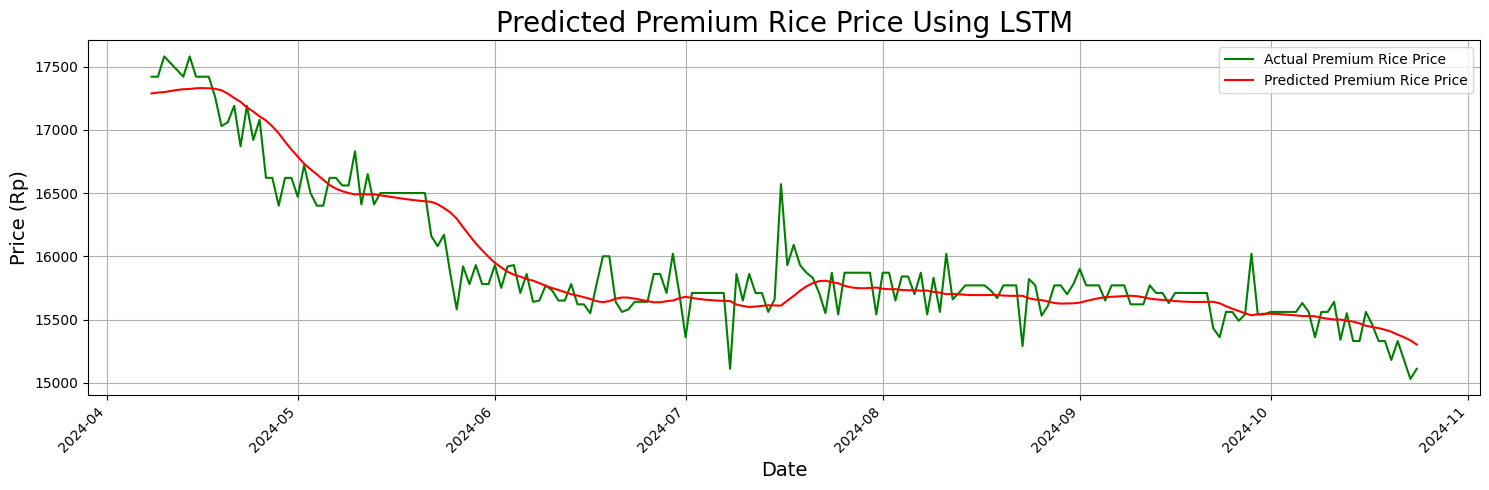

Train Mean Absolute Error (MAE): 116.31 Rp
Test Mean Absolute Error (MAE): 139.66 Rp
Train Root Mean Squared Error (RMSE): 194.07 Rp
Test Root Mean Squared Error (RMSE): 193.21 Rp


In [24]:
plt.figure(figsize=(15, 5))
plt.plot(df_final.index[-len(y_test):], y_test_actual, color='g', label='Actual Premium Rice Price')
plt.plot(df_final.index[-len(y_test):], test_predict, color='r', label='Predicted Premium Rice Price') # Changed predicted_prices to test_predict
plt.title('Predicted Premium Rice Price Using LSTM', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (Rp)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Evaluate model performance using MAE and RMSE
mae_train = mean_absolute_error(y_train_actual, train_predict)
rmse_train = np.sqrt(mean_squared_error(y_train_actual, train_predict))
mae_test = mean_absolute_error(y_test_actual, test_predict)
rmse_test = np.sqrt(mean_squared_error(y_test_actual, test_predict))

# Print the evaluation metrics
print(f'Train Mean Absolute Error (MAE): {mae_train:.2f} Rp')
print(f'Test Mean Absolute Error (MAE): {mae_test:.2f} Rp')
print(f'Train Root Mean Squared Error (RMSE): {rmse_train:.2f} Rp')
print(f'Test Root Mean Squared Error (RMSE): {rmse_test:.2f} Rp')

**Mean Squared Error (MSE)**
MSE is a way to measure how far off your predictions are from the actual results. You take the difference between each predicted value and the actual value, square those differences (to make sure they're all positive), and then average them.
Squaring the differences helps to give more weight to larger errors, so MSE is sensitive to big mistakes. If you make a big error, MSE will show that clearly.


**Root Mean Squared Error (RMSE)**
RMSE is just the square root of MSE. It takes the average of the squared differences (like MSE) but then brings it back to the same units as your original data by taking the square root.
RMSE is often easier to understand because it’s in the same scale as the data. So if you’re predicting something like temperature in degrees, RMSE will also be in degrees, making it more intuitive.

**When to Use MSE and RMSE**
Use MSE when you want to focus on larger errors and you don’t mind the values being in squared units. It’s good for comparing different models because it penalizes larger mistakes more.
Use RMSE when you want a measure that’s easy to interpret and in the same units as your data. It’s helpful for giving a clear idea of how far off your predictions are, on average.

# **Model 2 Using Bidirectional LSTM**

## Modelling

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense

# Build the Bidirectional LSTM model
model2 = Sequential()
model2.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(time_step, 1)))
model2.add(Dropout(0.2))  # Dropout to prevent overfitting
model2.add(Bidirectional(LSTM(100, return_sequences=False)))
model2.add(Dropout(0.2))
model2.add(Dense(1))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 30, 200)             │          81,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 200)                 │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,601 (1.23 MB)

 Trainable params: 322,601 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

## Trainning

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

# Set an initial learning rate and create a scheduler function to adjust it during training
initial_learning_rate = 0.001
def lr_schedule(epoch, lr):
    if epoch > 20:
        return lr * 0.1  # Reduce the learning rate after 20 epochs
    return lr

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model with the initial learning rate
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate), loss='mean_squared_error')

# Train the model with callbacks
history = model2.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, checkpoint, lr_scheduler],
    verbose=1
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0133 - val_loss: 0.0152 - learning_rate: 0.0010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0018 - val_loss: 0.0079 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013 - val_loss: 0.0114 - learning_rate: 0.0010
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0013 - val_loss: 0.0037 - learning_rate: 0.0010
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018 - val_loss: 0.0097 - learning_rate: 0.0010
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 0.0057 - learning_rate: 0.0010
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.4615e-04 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - val_loss: 0.0028 - learning_rate: 0.0010
Epoch 10/50
25/

## Predicting

In [28]:
# Make predictions on training and testing data
train_predict = model2.predict(X_train)
test_predict = model2.predict(X_test)

# Inverse transform predictions and actual values to the original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


## Visualizing and Evaluating

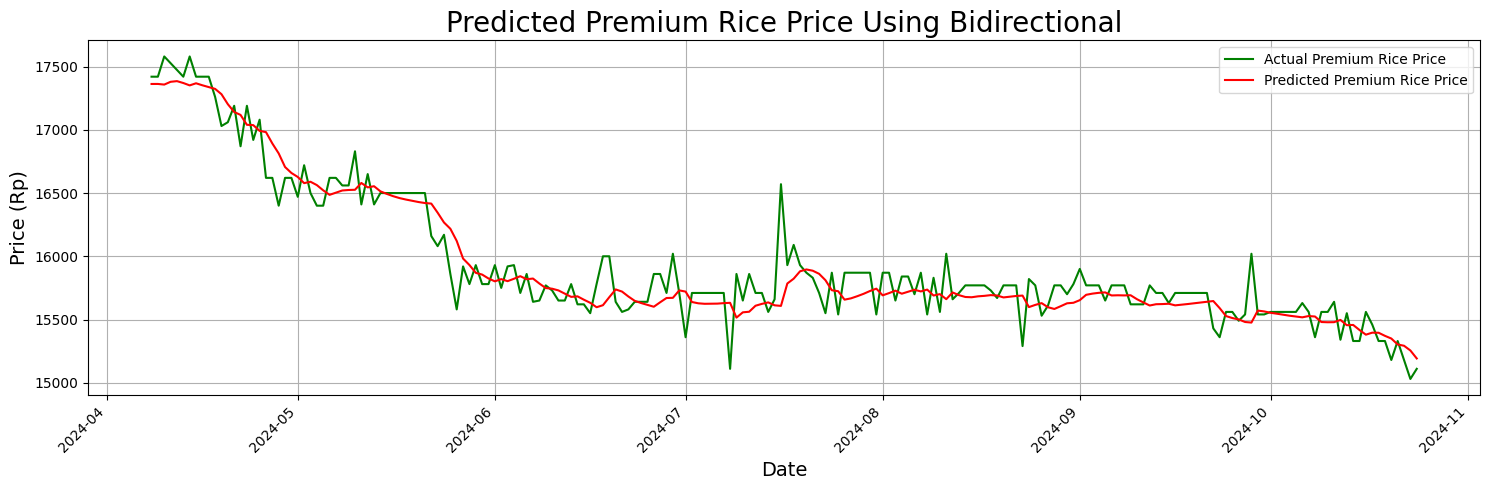

Train Mean Absolute Error (MAE): 83.50 Rp
Test Mean Absolute Error (MAE): 128.24 Rp
Train Root Mean Squared Error (RMSE): 147.30 Rp
Test Root Mean Squared Error (RMSE): 173.58 Rp


In [29]:
# Visualize the prediction results
plt.figure(figsize=(15, 5))
plt.plot(df_final.index[-len(y_test):], y_test_actual, color='g', label='Actual Premium Rice Price')
plt.plot(df_final.index[-len(y_test):], test_predict, color='r', label='Predicted Premium Rice Price')
plt.title('Predicted Premium Rice Price Using Bidirectional', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (Rp)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Evaluate model performance using MAE and RMSE
mae_train = mean_absolute_error(y_train_actual, train_predict)
rmse_train = np.sqrt(mean_squared_error(y_train_actual, train_predict))
mae_test = mean_absolute_error(y_test_actual, test_predict)
rmse_test = np.sqrt(mean_squared_error(y_test_actual, test_predict))

# Print the evaluation metrics
print(f'Train Mean Absolute Error (MAE): {mae_train:.2f} Rp')
print(f'Test Mean Absolute Error (MAE): {mae_test:.2f} Rp')
print(f'Train Root Mean Squared Error (RMSE): {rmse_train:.2f} Rp')
print(f'Test Root Mean Squared Error (RMSE): {rmse_test:.2f} Rp')

# **Model 3 Using ARIMA**

## Import Library

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import itertools
import statsmodels.api as sm

## Is the data stasionary? If it is not, doing differencing

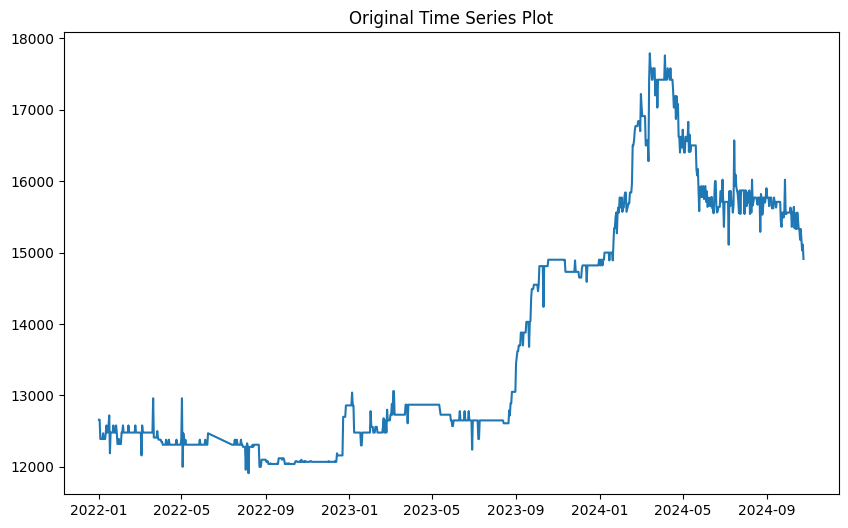

ADF Statistic: -0.729718
p-value: 0.838901
Data is non-stationary, consider differencing


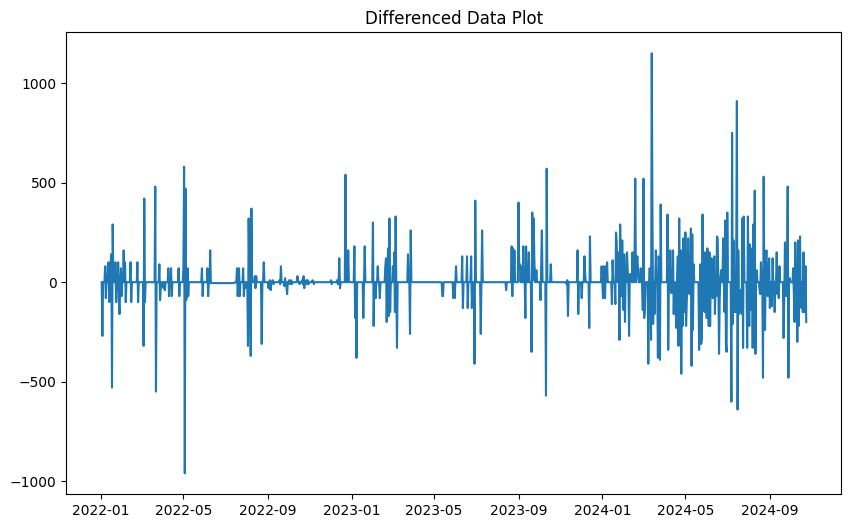

ADF Statistic: -23.656755
p-value: 0.000000
Data is stationary


In [31]:
# Function to check if the data is stationary
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary, consider differencing")

# Function to difference data to make it stationary
def difference_data(data, column_name):
    return data[column_name].diff().dropna()

# Load dataset from CSV file
data = pd.read_csv('data_final.csv', index_col='date', parse_dates=True)

# Plot original time series data
def plot_data(data, title='Time Series Plot'):
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    plt.title(title)
    plt.show()

# Plot original data
plot_data(data['beras_premium'], title='Original Time Series Plot')

# Check stationarity of the original data
check_stationarity(data['beras_premium'])

# If data is non-stationary, perform differencing
differenced_data = difference_data(data, 'beras_premium')

# Plot differenced data
plot_data(differenced_data, title='Differenced Data Plot')

# Check stationarity after differencing
check_stationarity(differenced_data)

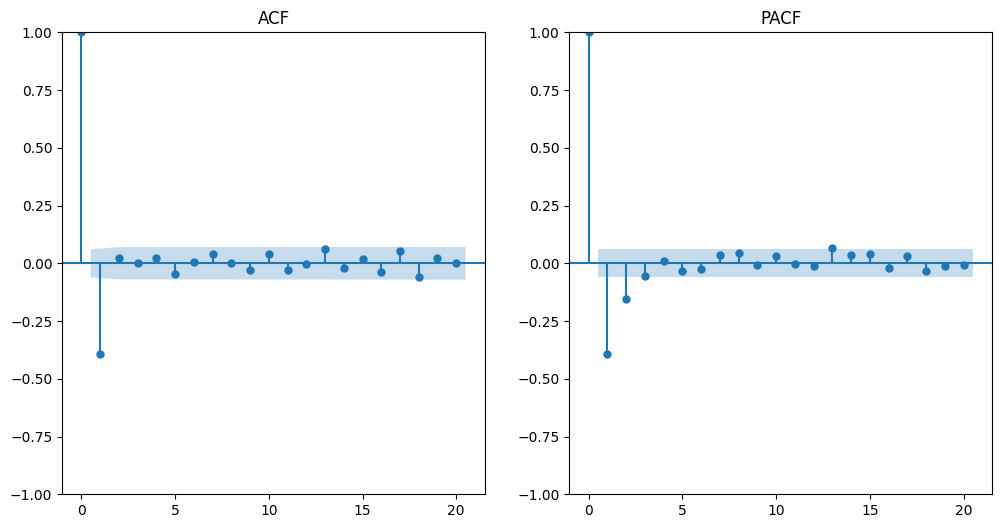

In [32]:
# Function to plot ACF and PACF
def plot_acf_pacf(data, lags=20):
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.title('ACF')

    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.title('PACF')

    plt.show()

# Plot ACF and PACF to determine p, d, q
plot_acf_pacf(differenced_data)


## ARIMA model Using p,d,q = 1,1,1

In [33]:
# Setting ARIMA model order based on ACF and PACF plots
p, d, q = 1, 1, 1

# Function to train ARIMA model
def train_arima_model(data, p, d, q):
    model = ARIMA(data, order=(p, d, q))
    return model.fit()

# Train ARIMA model
model_fit = train_arima_model(data['beras_premium'], p, d, q)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Plot Residual

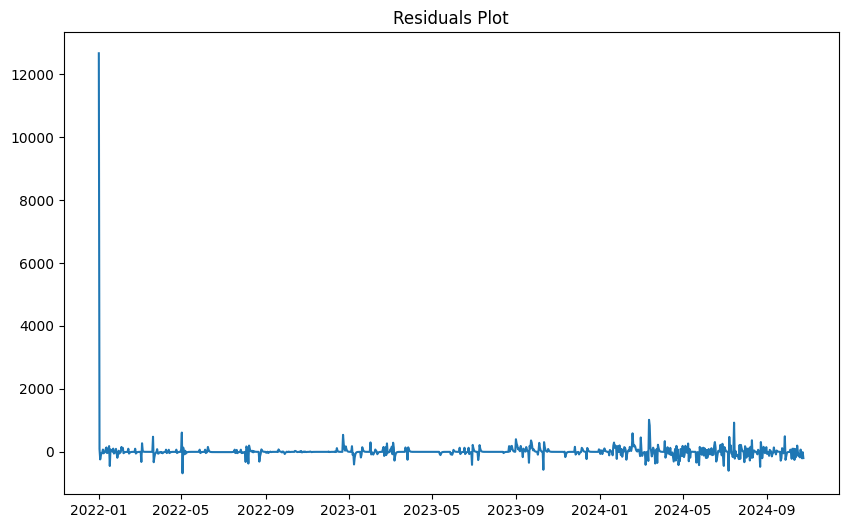

In [34]:
# Function to plot residuals
def plot_residuals(model_fit):
    residuals = pd.DataFrame(model_fit.resid)
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title('Residuals Plot')
    plt.show()

plot_residuals(model_fit)

# Forecast future steps
forecast_steps = 60

def forecast_future(model_fit, steps):
    return model_fit.forecast(steps=steps)

forecast = forecast_future(model_fit, forecast_steps)

## Evaluation and Visualisation

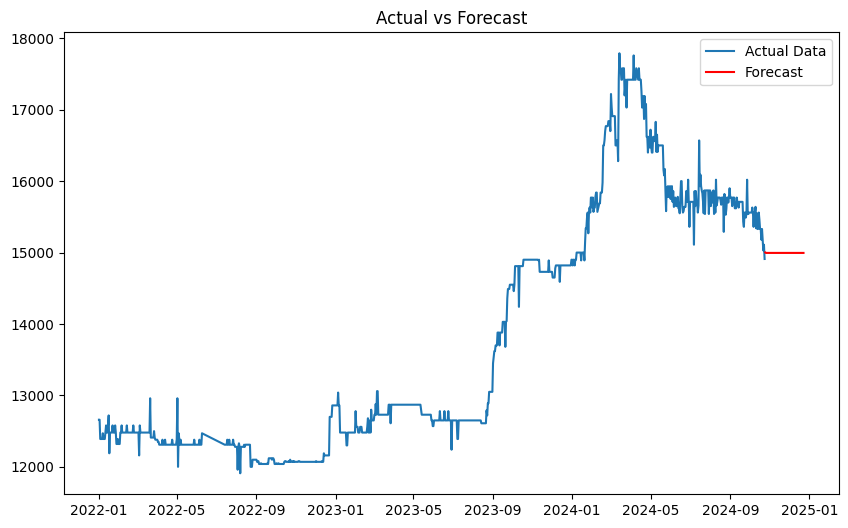

RMSE: 606.4357
MSE: 367764.3061


In [35]:
# Function to plot actual vs forecast
def plot_forecast(data, forecast, steps, title='Actual vs Forecast'):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['beras_premium'], label='Actual Data')
    future_dates = pd.date_range(data.index[-1], periods=steps+1, freq='D')[1:]
    plt.plot(future_dates, forecast, label='Forecast', color='red')
    plt.title(title)
    plt.legend()
    plt.show()

plot_forecast(data, forecast, forecast_steps)

# Model evaluation with RMSE and MSE
def evaluate_model(data, forecast, steps):
    actual = data['beras_premium'][-steps:]
    rmse = np.sqrt(mean_squared_error(actual, forecast[:steps]))
    mse = mean_squared_error(actual, forecast[:steps])
    print(f'RMSE: {rmse:.4f}')
    print(f'MSE: {mse:.4f}')

evaluate_model(data, forecast, forecast_steps)

The  model performs bad. We will try another combination of p,d,q

## Find the best combination of p,d,q (1,1,2)



In [36]:
# Define p, d, q parameter range for ARIMA
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

# Generate combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Variables to store the best model
best_aic = float('inf')
best_order = None
best_model = None

## ARIMA model 1,1,2

In [37]:
# Try each combination for ARIMA without seasonality
for param in pdq:
    try:
        model = sm.tsa.ARIMA(data['beras_premium'], order=param)
        results = model.fit()
        print(f'ARIMA{param} - AIC: {results.aic}')

        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
            best_model = results
    except Exception as e:
        continue

# Display the best model results
print(f'Best ARIMA Model: ARIMA{best_order} - AIC: {best_aic}')
print(best_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(0, 0, 0) - AIC: 18185.372015358007
ARIMA(0, 0, 1) - AIC: 16920.23172050831


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2) - AIC: 16002.533088124246
ARIMA(0, 1, 0) - AIC: 13043.589645147285
ARIMA(0, 1, 1) - AIC: 12848.001442943998
ARIMA(0, 1, 2) - AIC: 12848.759788555722
ARIMA(1, 0, 0) - AIC: 13062.940695190766


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(1, 0, 1) - AIC: 12869.60074187129
ARIMA(1, 0, 2) - AIC: 12870.10574693669
ARIMA(1, 1, 0) - AIC: 12874.943219231356


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(1, 1, 1) - AIC: 12848.818038605677


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2) - AIC: 12843.188255896812


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0) - AIC: 12894.836693315816


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1) - AIC: 12870.206432110386


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2) - AIC: 12872.131109400712
ARIMA(2, 1, 0) - AIC: 12851.86003904359


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

ARIMA(2, 1, 1) - AIC: 12850.65082313233
ARIMA(2, 1, 2) - AIC: 12852.81808741725
Best ARIMA Model: ARIMA(1, 1, 2) - AIC: 12843.188255896812
                               SARIMAX Results                                
Dep. Variable:          beras_premium   No. Observations:                 1028
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -6417.594
Date:                Mon, 04 Nov 2024   AIC                          12843.188
Time:                        05:32:01   BIC                          12862.926
Sample:                    01-01-2022   HQIC                         12850.680
                         - 10-24-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9738      0.015     65.460      0.000       0.945     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Forecasting

In [42]:
# Forecast using the best model
pred_start_date = '2023-01-01'
pred_end_date = '2024-12-31'

# Forecast future values
pred = best_model.predict(start=pred_start_date, end=pred_end_date, typ='levels')

## Visualisation and Evaluation

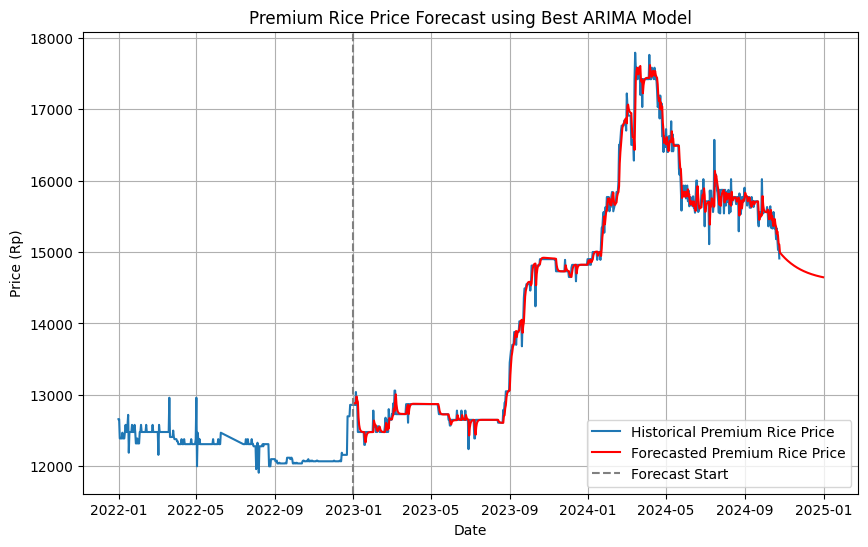

Mean Squared Error (MSE): 19849.36
Root Mean Squared Error (RMSE): 140.89


In [43]:
# Visualize the forecast against the actual data
plt.figure(figsize=(10, 6))
plt.plot(data['beras_premium'], label='Historical Premium Rice Price')
plt.plot(pred, color='red', label='Forecasted Premium Rice Price')

# Convert pred_start_date to datetime
pred_start_date = pd.to_datetime(pred_start_date)  # Convert to datetime object

plt.axvline(x=pred_start_date, color='gray', linestyle='--', label='Forecast Start')
plt.title('Premium Rice Price Forecast using Best ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price (Rp)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Convert pred_start_date to datetime
pred_start_date = pd.to_datetime(pred_start_date)

min_len = min(len(data['beras_premium'][pred_start_date:pred_end_date]), len(pred))
actual_data = data['beras_premium'][pred_start_date:pred_end_date][:min_len]
pred = pred[:min_len]


# Calculate MSE and RMSE
mse = mean_squared_error(actual_data, pred)
rmse = np.sqrt(mse)

# Print evaluation results
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# **Comparison**

Comparison of Models:


Bidirectional LSTM consistently yields lower error values compared to the standard LSTM and both ARIMA models. Specifically:
MAE and RMSE on the Test Set are significantly lower in Bidirectional LSTM compared to both LSTM and ARIMA, indicating it generalizes better to unseen data.

Bidirectional LSTM achieves a Test RMSE of 173.58 Rp, which is lower than both ARIMA models (even the optimized ARIMA(1,1,2) model with RMSE of 140.89 Rp).
ARIMA Models perform worse, especially in ARIMA(1,1,1) with extremely high error values, suggesting an inadequate fit for the data’s complexity. While the ARIMA(1,1,2) model reduces RMSE to 140.89 Rp, it still lags behind the deep learning models.

The Bidirectional LSTM model is the best choice based on its lower error values across both train and test sets, indicating both good fit and generalization. This model effectively captures complex patterns in the time series data, particularly useful for non-linear and seasonally fluctuating data like rice prices, where ARIMA might not capture these trends effectively.


# **Conclusion**


1. For this time series task, **the Bidirectional LSTM model offers the best performance** and should be the model of choice for accurate rice price forecasting.

2. Price rice decreases in the future.